In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from wordcloud import WordCloud
warnings.filterwarnings("ignore")



df = pd.read_csv('./earthquakes.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

           id  magnitude        type  \
0  us7000necw        4.8  earthquake   
1  tx2024shcj        5.1  earthquake   
2  ci40734823        3.7  earthquake   
3  tx2024scvz        3.9  earthquake   
4  us7000ndte        4.1  earthquake   

                                        title                 date  \
0         M 4.8 - 33 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
1         M 5.1 - 34 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
2                M 3.7 - 6 km N of Malibu, CA  2024-09-16T11:22:08   
3  M 3.9 - 58 km S of Whites City, New Mexico  2024-09-14T17:01:06   
4  M 4.1 - 60 km S of Whites City, New Mexico  2024-09-14T17:01:06   

            time        updated  \
0  1726534182289  1726583895255   
1  1726534182183  1726672002991   
2  1726485728190  1726637414586   
3  1726333266539  1726584426218   
4  1726333266382  1726334616179   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://eart

In [2]:
cleaned_df = df.dropna()
print(cleaned_df.isnull().sum())

id                 0
magnitude          0
type               0
title              0
date               0
time               0
updated            0
url                0
detailUrl          0
felt               0
cdi                0
mmi                0
alert              0
status             0
tsunami            0
sig                0
net                0
code               0
ids                0
sources            0
types              0
nst                0
dmin               0
rms                0
gap                0
magType            0
geometryType       0
depth              0
latitude           0
longitude          0
place              0
distanceKM         0
placeOnly          0
location           0
continent          0
country            0
subnational        0
city               0
locality           0
postcode           0
what3words         0
timezone           0
locationDetails    0
dtype: int64


In [3]:
print(cleaned_df.describe())

       magnitude          time       updated           felt        cdi  \
count  68.000000  6.800000e+01  6.800000e+01      68.000000  68.000000   
mean    4.466324  1.716965e+12  1.720941e+12    5996.588235   5.382353   
std     0.432873  8.407731e+09  6.833506e+09   22909.176254   0.914712   
min     3.500000  1.693191e+12  1.705147e+12      10.000000   4.000000   
25%     4.100000  1.708152e+12  1.714665e+12      82.500000   5.000000   
50%     4.440000  1.721876e+12  1.725126e+12     269.000000   5.000000   
75%     4.800000  1.723004e+12  1.726348e+12    2042.000000   6.000000   
max     5.220000  1.726534e+12  1.726672e+12  183786.000000   7.000000   

             mmi    tsunami          sig         nst       dmin        rms  \
count  68.000000  68.000000    68.000000   68.000000  68.000000  68.000000   
mean    5.294118   0.147059   592.323529   57.632353   0.142172   0.386324   
std     0.754268   0.356798   296.328753   45.568353   0.223281   0.287547   
min     4.000000   0.

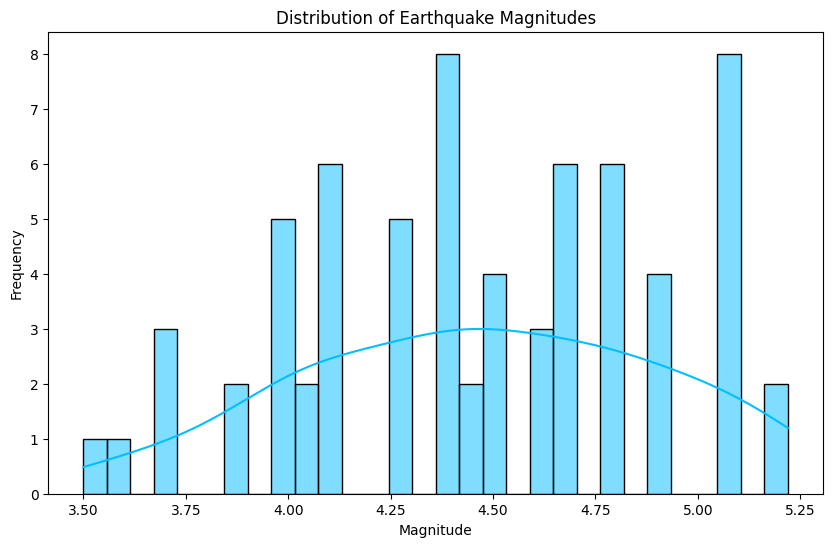

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['magnitude'], bins=30, kde=True, color='#00BFFF')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

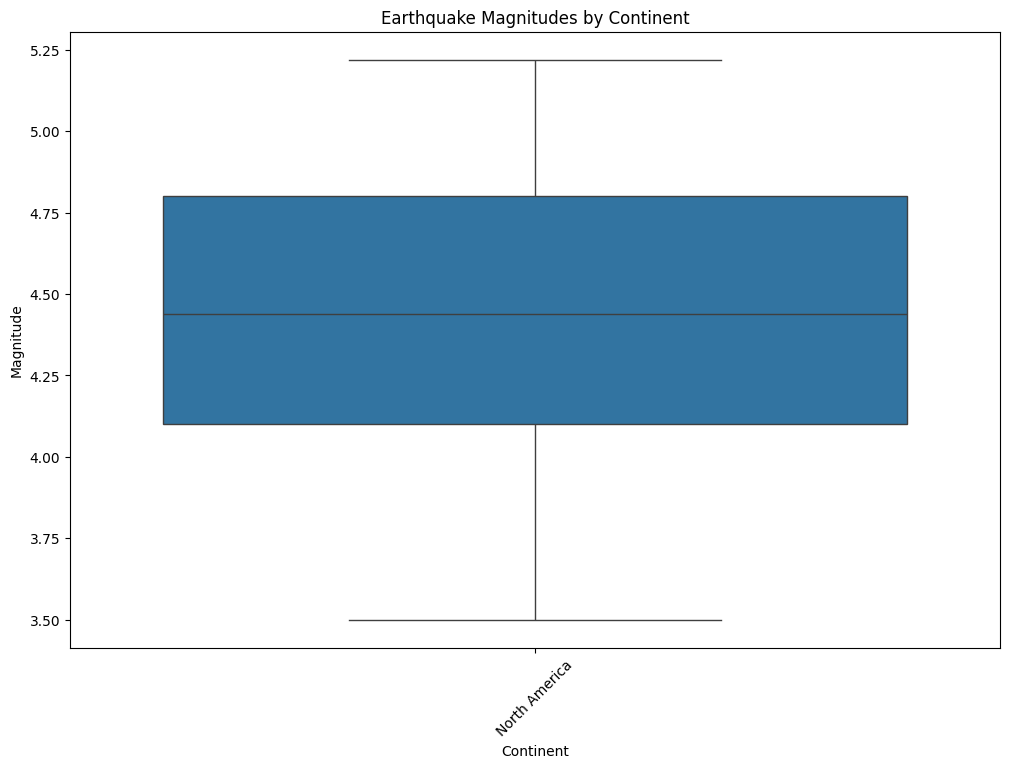

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='continent', y='magnitude', data=cleaned_df)
plt.title('Earthquake Magnitudes by Continent')
plt.xlabel('Continent')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.show()

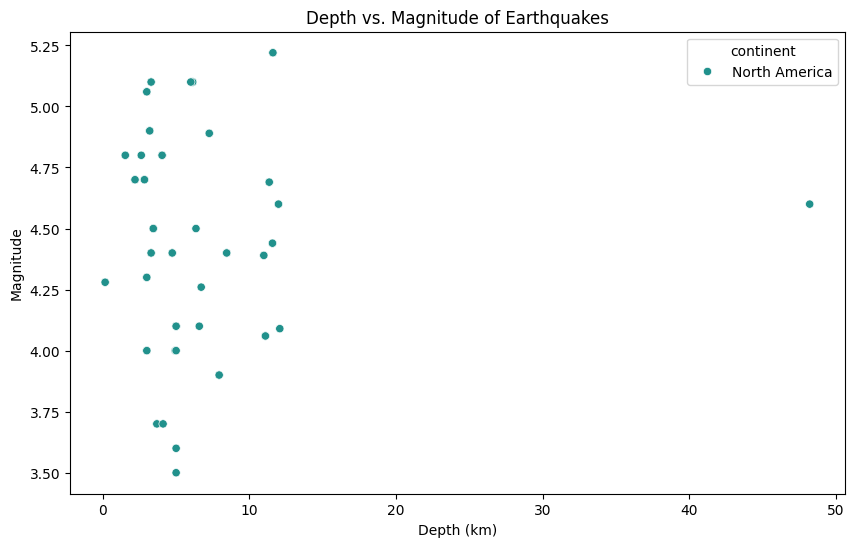

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='magnitude', hue='continent', data=cleaned_df, palette='viridis')
plt.title('Depth vs. Magnitude of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

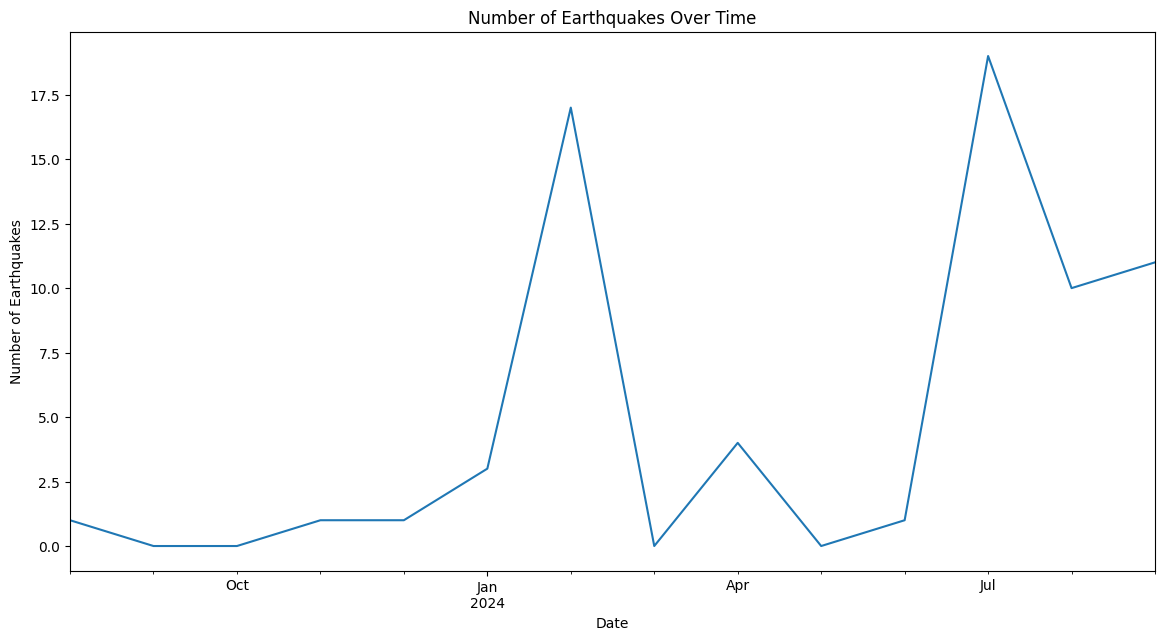

In [7]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
earthquakes_over_time = cleaned_df.set_index('date').resample('M').size()

plt.figure(figsize=(14, 7))
earthquakes_over_time.plot()
plt.title('Number of Earthquakes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.show()

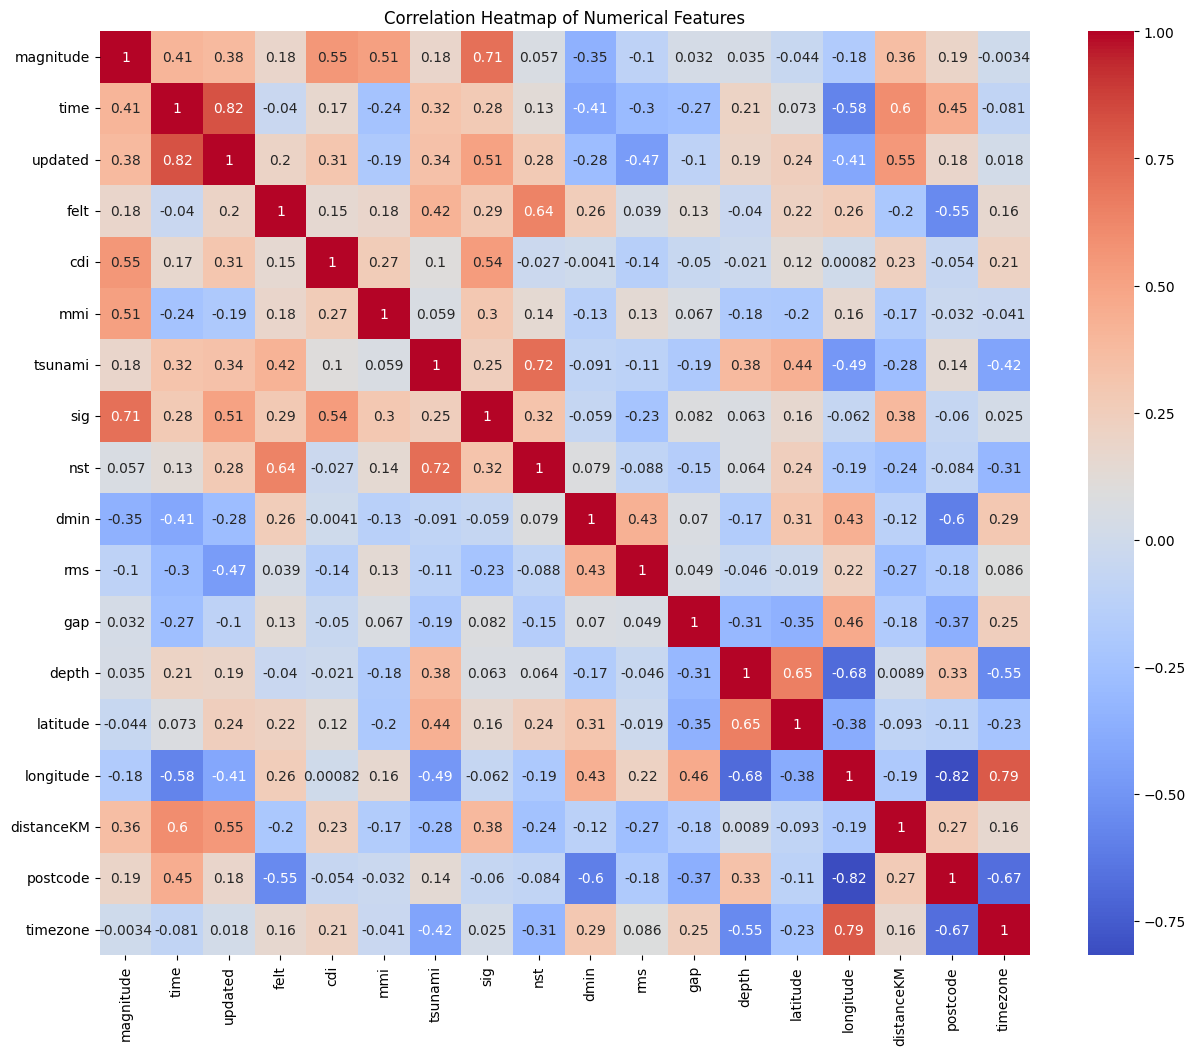

In [8]:
plt.figure(figsize=(15, 12))
sns.heatmap(cleaned_df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

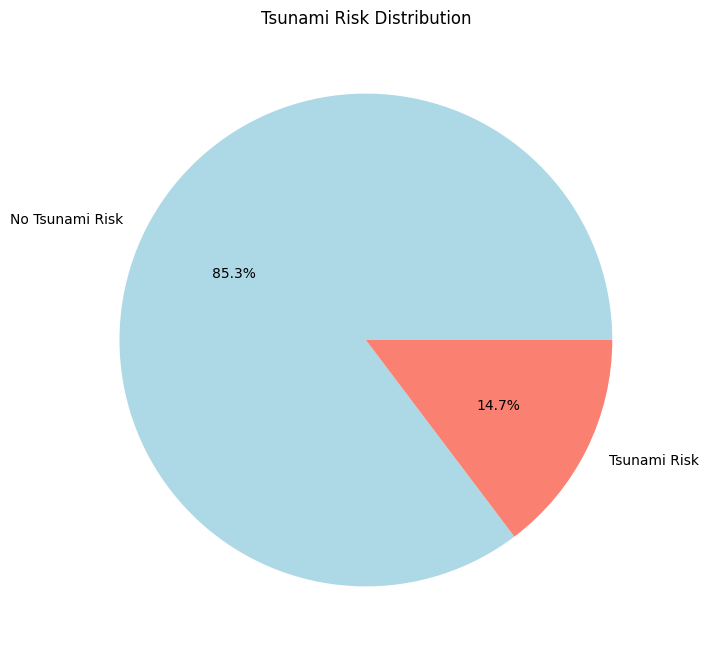

In [9]:
tsunami_counts = cleaned_df['tsunami'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(tsunami_counts, labels=['No Tsunami Risk', 'Tsunami Risk'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Tsunami Risk Distribution')
plt.show()

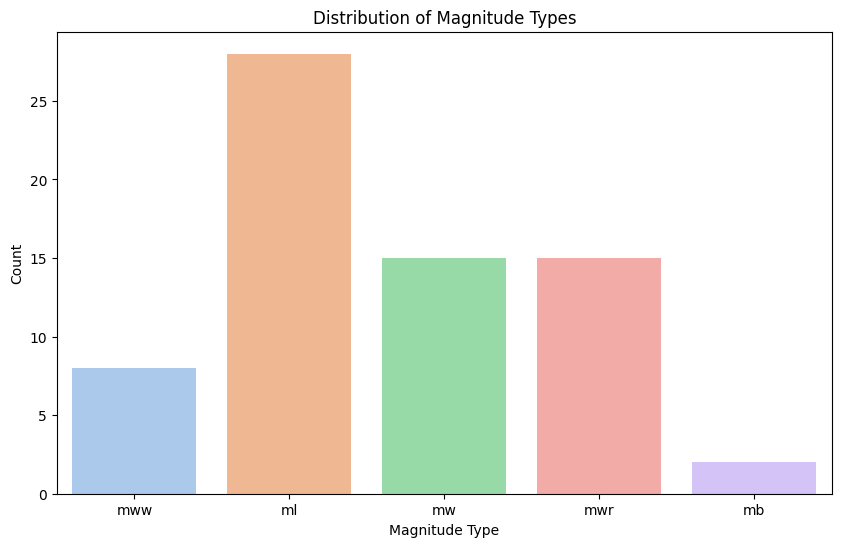

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='magType', data=cleaned_df, palette='pastel')
plt.title('Distribution of Magnitude Types')
plt.xlabel('Magnitude Type')
plt.ylabel('Count')
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming cleaned_df is already defined

# Define the target variable (y) and features (X)
X = cleaned_df.select_dtypes(include=['float64', 'int64']).drop(columns=['magnitude'])
y = cleaned_df['magnitude']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.052220495094071014
R² Score: 0.742502489674206
